# 继承封装

In [101]:
#复用

#接口 interface 只需要考虑接口，接口内部不需要考虑
#实现 implementation 接口内部的东西

#封装 设计一个高性能的implementation 和简单的interface，使得别人能快速上手**

#继承

## 继承

In [4]:
from person import person, gender 
class employee(person):#从person继承已有的成果
    def __init__(self,emplno,idno,name):
        super(employee,self).__init__(idno,name)#super上一级，实现父类person的构造函数‘__int__‘那个
        #等价于 person.__int__(self,idno,name)
        #接下来描述不同的地方
        self.semployeeno = emplno
        self.sjobtitle = ''
        self.sdepartment = ''
        self.weeksalary = 0
    def work(self):
        print('i am a',self.sjobtitle)
    def speak(self):
        super().speak()#调用父辈的speak方法
        print('employee::speak():')
        print('i am happy to work for you')

#实例化employee
yangchen=employee('3180101','330327','yangchen')
yangchen.gender = gender.male
yangchen.sdepartment = 'study'
yangchen.sjobtitle = 'student'
yangchen.weeksalary = 2000

#employee 杨晨 动作
yangchen.work()#使用函数def work(self):，但是没有给self，yangchen就是隐含的self
yangchen.speak()
print(yangchen.semployeeno)

i am a student
person::speak():
i am yangchen, nice to meet you
employee::speak():
i am happy to work for you
3180101


## 多态 polymorphism & 抽象类 abstract class
## ppt内部结构为例

### 抽象类

In [5]:
from abc import ABC,abstractmethod #Abstract Base Classes
class shape(ABC):
    @abstractmethod
    def draw(self):
        pass
    @abstractmethod
    def getSize(self):
        pass
#@abstractmethod代表shape是基类，抽象类，无法被实例化
#a = shape(%%javascript将会提示：Can't instantiate abstract class shape with abstract methods draw, getSize

class triangle(shape):#triangle从shape继承
    def __int__(self):
        self.point0 = (0,0)
        self.point1 = (1,1)
        self.point2 = (0,1)
    
    def draw(self):#自己画自己
        print('triangle::draw')
    
    def getSize(self):
        pass #detail omitted内容重载了，但是pass不执行
    
    def getArea(self):
        return 0

class circle(shape):#triangle从shape继承
    def __int__(self):
        self.ptCenter = (0,0)
        self.iRadius = 0
    
    def draw(self):
        print('circle::draw')
    
    def getSize(self):
        pass #detail omitted内容重载了，但是pass不执行
    
    def getArea(self):
        return 0

#实例化类
t1 = triangle()
t2 = triangle()
c1 = circle()
c2 = circle()

In [102]:
#pptx模拟一个ppt，将界面元素组织在列表中
pptx = [t1,t2,c1,c2]

#### 错误的遍历元素，全部画出
假如借助**外部方法**画出pptx中的所有元素，每个类型都要画，利用for循环   
而且外部程序必须得要先知道pptx内部所有的**数据结构**，违反隐藏内部原则  
```
for x in pptx:
        if __name__ == '__main__':
            if type(x) == traingle:
                drawline(x.point0,x.point1)
            elif type(x) == circle:
                drawcircle()
            elif
            #...
```

#### 正确的遍历元素，全部画出
前面在定义triangle和circle类型时，内置了draw函数，可以**自己画自己**，因此draw是对象的一个对自己的动作，使用x.draw()就可以实现画自己  

和上面错误的方法比较，x.draw就是一个**interface**，implementation都在内部解决，外部不需要明白原理

In [7]:
def renderDocument(pptx):
    for x in pptx:
        x.draw()
renderDocument(pptx)

triangle::draw
triangle::draw
circle::draw
circle::draw


### 多态
上面的`pptx = [t1,t2,c1,c2]`就称为多态。

pptx列表里的t1,c1...，并**不知道**他们是什么类型，比如t1是triangle类，c1是circle类。  
但是把他们当作shape类型来用，**好像**执行shape.triangle()（实际shape是抽象类无法执行）

具体到执行动作时，每一个x,又会执行**各自**类的draw（）
```
def renderDocument(pptx):
    for x in pptx:
        x.draw()
renderDocument(pptx)
```

#### 多态的优点
假如需要增添rectangle类，和circle、triangle并列。  

再执行遍历元素全部画出图形
```
pptx = [t1,t2,c1,c2]
def renderDocument(pptx):
    for x in pptx:
        x.draw()
renderDocument(pptx)
```
只需要增加如下部分` r1 = rectangle(), pptx = [t1,t2,c1,c2,r1]`

#### 总结
多态的好处就是，当我们需要传入更多的子类，例如新增 rectangle 等时，我们只需要继承 shape 类型就可以了，而draw（）方法既可以直不重写（即使用shape的），也可以重写一个特有的。这就是多态的意思。

调用方只管调用，不管细节，而当我们新增一种shape的子类时，只要确保新方法编写正确，而不用管原来的代码。这就是著名的**“开闭”原则**：

    对扩展开放（Open for extension）：允许子类重写方法函数
    对修改封闭（Closed for modification）：不重写，直接继承父类方法函数

## 套娃继承

**这是一个套娃**  
首先看`def __init__(self):`，当实例化D时，首先执行初始化里的`super(D,self).__init__()`,等价于`C.__init__()`  
`C.__init__()`  将执行` print('C is init')`和`super(C,self).__init__()`，又等价于`B.__init__()`  
...最终D的`def __init__(self):`执行ABCD全部的`def __init__(self)`

而且D继承了ABCD所有的方法，method1,2,3,4
*************************************

**几个与继承链有关的方法和属性**  
`issubclass(D,A)`
`D.__bases__`
`isinstance(d,D)`
`d.__class__`

In [103]:
class A:
    def __init__(self):
        print('A is init')
    def method1(self):
        print('method 1 ok')

class B(A):
    def __init__(self):
        super(B,self).__init__()
        print('B is init')
    def method2(self):
        print('method 2 ok')

class C(B):
    def __init__(self):
        super(C,self).__init__()
        print('C is init')
    def method3(self):
        print('method 3 ok')

class D(C):
    def __init__(self):
        super(D,self).__init__()
        print('D is init')
    def method4(self):
        print('method 4 ok')

d= D()
print(issubclass(D,A))#判断D是不是A的子类
print(D.__bases__)#加两个下划线是系统的，特殊定义，自己不要用。可以查D的父类是什么
print(isinstance(d,D))#d是不是D的实例
print(d.__class__)

A is init
B is init
C is init
D is init
True
(<class '__main__.C'>,)
True
<class '__main__.D'>


## 多重继承
继承多个父类，所有的属性和方法都可以继承  
**注意**子类中多个父类如何初始化
```
 def __init__(self):
        super().__init__()#只能初始化一个父类对象，左边第一个
        #更好的是Person.__init__(self)
        TaxPayer.__init__(self)#只能显式初始化,self是employee的实例
```

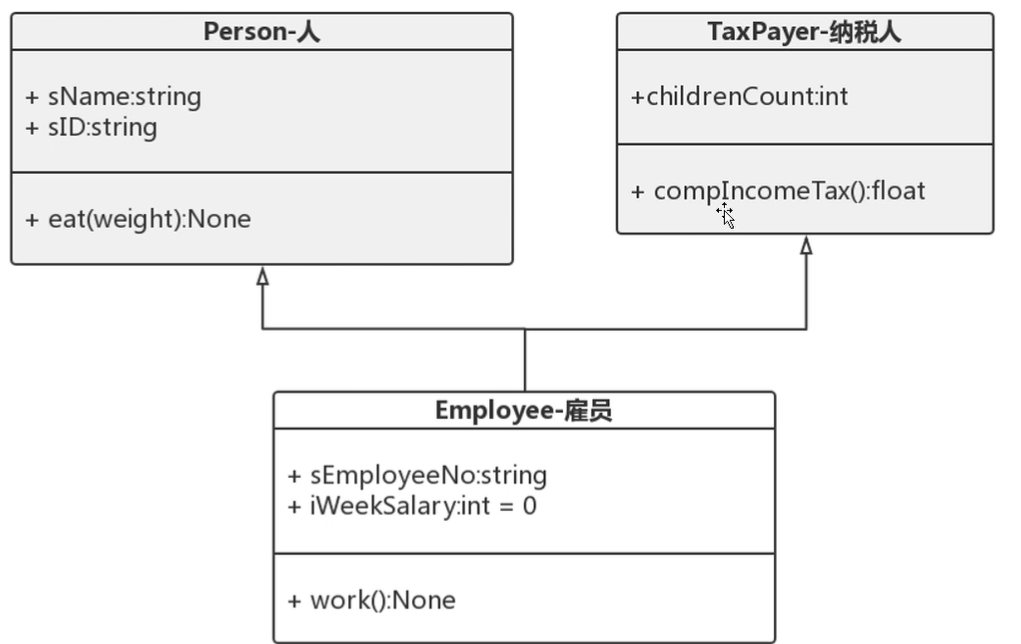

In [10]:
class Person:
    def __init__(self):
        self.sName = ''
        self.sId = ''
        print('Person::__init__().')
    
    def eat(self,weight):
        print('person::eat():',weight,'gram of food')

class TaxPayer:
    def __init__(self):
        self.childernCount = 0
        print('TaxPayer::__init___().')
    
    def compIncomeTax(self):
        print('TaxPayer::compIncomeTax().')
        return 0
class Employee(Person,TaxPayer):
    def __init__(self):
        super().__init__()#只能初始化一个父类对象，左边第一个
        #更好的是Person.__init__(self)
        TaxPayer.__init__(self)#只能显式初始化,self是employee的实例
        self.sEmpolyeeNo = ''
        self.iWeekSalary = 0
        print('Employee::__init__()')
        
    def work(self):
        print('Employee::work().')
yang = Employee()
yang.eat(20)
yang.compIncomeTax()
yang.iWeekSalary = 2000
yang.sEmpolyeeNo = 3180101

Person::__init__().
TaxPayer::__init___().
Employee::__init__()
person::eat(): 20 gram of food
TaxPayer::compIncomeTax().


### 特殊方法  魔法方法
带有'__'称为**特殊方法**  

python中特殊方法（魔术方法）是被python解释器调用的，我们自己不需要调用它们，是解释器隐含执行。我们统一使用内置函数来使用。
************
`__init__()`

初始化函数

`__del__()`

对象生命周期结束时调用，__del__会先执行后清除。 

python解释器会在**恰当**的时候清除没用对象。这个恰当时候并不确定，不能假设

In [11]:
class person:
    def __init__(self,name ='N/A'):
        self.sName = name
        print('person::__init__')
    def __del__(self):
        print("Person::__del__")

d = person('yang')：执行构造函数
c = d 
d = None
print('-------------------------------')
c = 2 # 原本person('yang')此时不被任何对象绑定，解释器认为没有用了，生命周期结束
print('*******************************')


person::__init__
-------------------------------
Person::__del__
*******************************


## 方法的隐藏
方法的前面加'__'外部无法访问  
eg.假如执行 `hid.privateMethod()`,将会提示`AttributeError: 'hidden' object has no attribute 'privateMethod'`

but类内部是可以访问的  
eg.假如执行`hid.publicMethod()`将会得到`
this method should not be called outside`

In [108]:
class hidden:
    'this class will show you the private method'
    def __init__(self):
        pass
    def __privateMethod(self):
        print('this method should not be called outside')
    def publicMthod(self):
        self.__privateMethod()
hid = hidden()
hid.publicMthod()

this method should not be called outside
